In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

(1000, 2)
(1000, 1)


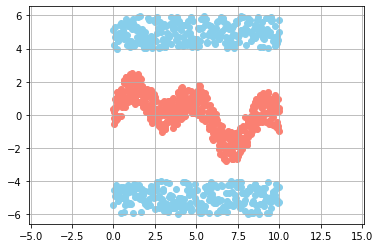

In [142]:
p = 2;
n = 500
X1a = np.linspace(0,10,n)
X2a = np.sin(2*np.pi*0.1*X1a) + np.sin(2*np.pi*0.25*X1a)  +(2*np.random.rand(len(X1a))-1)


X1b = np.concatenate((np.linspace(0,10,int(n/2)),np.linspace(0,10,int(n/2))),axis=0)
X2b = np.concatenate((5*np.ones(int(n/2))+(2*np.random.rand(int(n/2))-1),-5*np.ones(int(n/2))+(2*np.random.rand(int(n/2))-1)),axis=0)


X1 = np.concatenate((X1a,X1b), axis=0)
Y1 = np.ones(n)

X2 = np.concatenate((X2a,X2b), axis=0)
Y2 = np.zeros(n)

X = np.array([X1,X2]).T
Y = np.concatenate((Y1,Y2),axis=0)
Y  = Y[:,np.newaxis]

print(X.shape)
print(Y.shape)


plt.scatter(X[Y[:,0] == 0,0],X[Y[:,0] == 0,1],c="skyblue")
plt.scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1],c="salmon")
plt.axis("equal")

plt.grid()
plt.show()



(500, 2)
(500, 1)


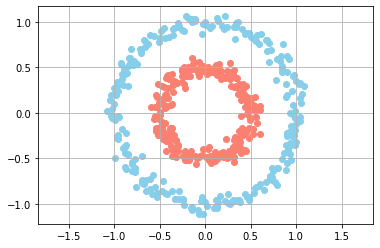

In [2]:
#Creamos el DataSET
n = 500;
p = 2;

X,Y = make_circles(n_samples=n,factor=0.5,noise=0.05)
Y  = Y[:,np.newaxis]

print(X.shape)
print(Y.shape)



plt.scatter(X[Y[:,0] == 0,0],X[Y[:,0] == 0,1],c="skyblue")
plt.scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1],c="salmon")
plt.axis("equal")

plt.grid()
plt.show()

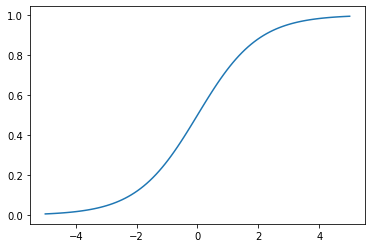

In [3]:
class neural_layer():
  def __init__(self,n_comn,n_neur,act_f):
    self.act_f = act_f
    self.b = np.random.rand(1,n_neur)*2 -1
    self.W = np.random.rand(n_comn,n_neur)*2 -1

#FUNCIONES DE ACTIVACION

sigm = (lambda x: 1/(1+np.e**(-x)),
        lambda x: x*(1-x))

_x = np.linspace(-5,5,100)
plt.plot(_x,sigm[0](_x))

In [4]:
def create_nn(topology,act_f):
  nn = []
  for l,layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l],topology[l+1],act_f))
  return nn


In [5]:
topology = [p,4,8,16,32,16,8,4,1]

neural_net = create_nn(topology,sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2),
            lambda Yp, Yr: (Yp - Yr))


def train(neural_net,X,Y,l2_cost,lr=0.5,train = True):
    out = [(None,X)]
    for l,layer in enumerate(neural_net):
        z = out[-1][1]@neural_net[l].W +  neural_net[l].b
        a = neural_net[l].act_f[0](z)
        out.append((z,a))

    if train:
        deltas = []
        for l in reversed(range(0,len(neural_net))):
            z = out[l+1][0]
            a = out[l+1][1]

            if l == len(neural_net)-1:
                deltas.insert(0,l2_cost[1](a,Y)*neural_net[l].act_f[1](a))

            else:
                deltas.insert(0,deltas[0]@_W.T * neural_net[l].act_f[1](a))

            _W = neural_net[l].W

            neural_net[l].b = neural_net[l].b - np.mean(deltas[0],axis = 0,keepdims = True) *lr
            neural_net[l].W = neural_net[l].W - out[l][1].T@deltas[0]*lr

    return out[-1][1]


train(neural_net,X,Y,l2_cost,0.5)
print("")

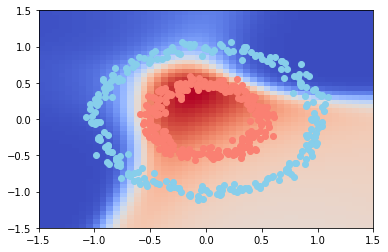

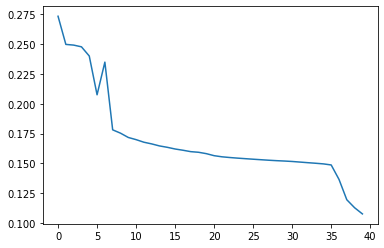

In [6]:
import time
from IPython.display import clear_output

topology = [p,4,8,1]

neural_n = create_nn(topology,sigm)
loss = []

for i in range(1000):
    pY = train(neural_n,X,Y,l2_cost,lr = 0.05)

    if i%25 == 0:
        #Entrenamos la red
        loss.append(l2_cost[0](pY , Y))

        res = 50

        _x0 = np.linspace(-1.5,1.5,res)
        _x1 = np.linspace(-1.5,1.5,res)

        _Y = np.zeros((res,res))

        for i0, x0 in enumerate(_x0):
            for i1,x1 in enumerate(_x1):
                _Y[i0,i1] = train(neural_n,np.array([[x0,x1]]),Y,l2_cost,train=False)[0][0]

        plt.pcolormesh(_x0,_x1,_Y,cmap="coolwarm")


        plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1],c="skyblue")
        plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1],c="salmon")

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)),loss)
        plt.show()
        time.sleep(0.5)


In [22]:
N = 2

L = [N,1]
max = 16

bandera = False

for i in range(1):
    if L[i]==16:
        bandera = True
    if bandera:
        n_neuronas = int(L[i]/2)
        L.insert(i+1,n_neuronas)
    else:
        n_neuronas = int(L[i]*2)
        L.insert(i+1,n_neuronas)



print(L)

[2, 4, 1]
